In [2]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def get_content(pattern, path="."):
    files = os.listdir(path)
    matches = [x for x in files if pattern in x]
    print(f"Found {len(matches)} matches: {matches}")
    name = matches[0]
    if name.endswith("npy"):
        return np.load(path+"/"+name)
    elif name.endswith("pickle"):
        with open(path+"/"+name, "rb") as f:
            return pickle.load(f)

def plot_lists(lists, legend=[], 
                legend_title="",
                figsize=(14,6), 
                subplots=(1,1),
                ax=None,
                ):
    if not ax:
        _, ax = plt.subplots(*subplots, figsize=figsize)
    [ax.plot(x) for x in lists]
    ax.legend(legend, title=legend_title)
    return ax


In [3]:
prefix_50 = "kb50-pl150_model-conv128-fcnn128"
val_losses_50 = get_content(f"{prefix_50}-val_losses")
train_losses_50 = get_content(f"{prefix_50}-train_losses")
val_metrics_50 = get_content(f"{prefix_50}-val_metrics")
train_metrics_50 = get_content(f"{prefix_50}-train_metrics")
duration_50 = get_content(f"{prefix_50}-duration")

prefix_75 = "kb75-pl150_model-conv128-fcnn128"
val_losses_75 = get_content(f"{prefix_75}-val_losses")
train_losses_75 = get_content(f"{prefix_75}-train_losses")
val_metrics_75 = get_content(f"{prefix_75}-val_metrics")
train_metrics_75 = get_content(f"{prefix_75}-train_metrics")
duration_75 = get_content(f"{prefix_75}-duration")

val_losses_150 = get_content("val_losses", path="../DEFAULT2")
train_losses_150 = get_content("train_losses", path="../DEFAULT2")
val_metrics_150 = get_content("val_metrics", path="../DEFAULT2")
train_metrics_150 = get_content("train_metrics", path="../DEFAULT2")
duration_150 = get_content("duration", path="../DEFAULT2")

prefix_100 = "kb100-pl150_model-conv128-fcnn128"
val_losses_100 = get_content(f"{prefix_100}-val_losses")
train_losses_100 = get_content(f"{prefix_100}-train_losses")
val_metrics_100 = get_content(f"{prefix_100}-val_metrics")
train_metrics_100 = get_content(f"{prefix_100}-train_metrics")
duration_100 = get_content(f"{prefix_100}-duration")

prefix_125 = "kb125-pl150_model-conv128-fcnn128"
val_losses_125 = get_content(f"{prefix_125}-val_losses")
train_losses_125 = get_content(f"{prefix_125}-train_losses")
val_metrics_125 = get_content(f"{prefix_125}-val_metrics")
train_metrics_125 = get_content(f"{prefix_125}-train_metrics")
duration_125 = get_content(f"{prefix_125}-duration")

prefix_175 = "kb175-pl150_model-conv128-fcnn128"
val_losses_175 = get_content(f"{prefix_175}-val_losses")
train_losses_175 = get_content(f"{prefix_175}-train_losses")
val_metrics_175 = get_content(f"{prefix_175}-val_metrics")
train_metrics_175 = get_content(f"{prefix_175}-train_metrics")
duration_175 = get_content(f"{prefix_175}-duration")

Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb50-pl150_model-conv128-fcnn128-val_losses.pickle']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb50-pl150_model-conv128-fcnn128-train_losses.pickle']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb50-pl150_model-conv128-fcnn128-val_metrics.pickle.npy']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb50-pl150_model-conv128-fcnn128-train_metrics.pickle.npy']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb50-pl150_model-conv128-fcnn128-duration.pickle']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb75-pl150_model-conv128-fcnn128-val_losses.pickle']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb75-pl150_model-conv128-fcnn128-train_losses.pickle']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb75-pl150_model-conv128-fcnn128-val_metrics.pickle.npy']
Found 1 matches: ['ep20-optim_adam-lr

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


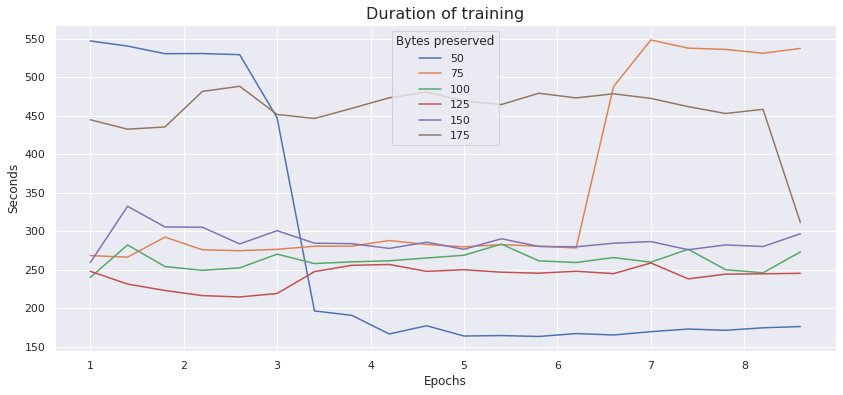

In [4]:
ax = plot_lists([duration_50, 
                duration_75, 
                duration_100, 
                duration_125, 
                duration_150, 
                duration_175], legend=[50, 75, 100, 125, 150, 175], legend_title="Bytes preserved")
ax.set_title("Duration of training", fontsize=16)
ax.set_xlabel("Epochs")
ax.set_xticklabels(list(range(len(duration_100))))
_ = ax.set_ylabel("Seconds")

50     277.372336
75     354.433389
100    261.985364
125    241.446186
150    287.671102
175    455.951812
dtype: float64

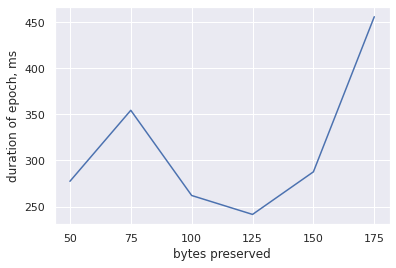

In [5]:
df = pd.DataFrame([duration_50, 
                duration_75, 
                duration_100, 
                duration_125, 
                duration_150, 
                duration_175], index=["50", "75", "100", "125", "150", "175"])
ax = df.mean(axis=1).plot()
ax.set_ylabel("duration of epoch, ms")
_ = ax.set_xlabel("bytes preserved")
df.mean(axis=1)

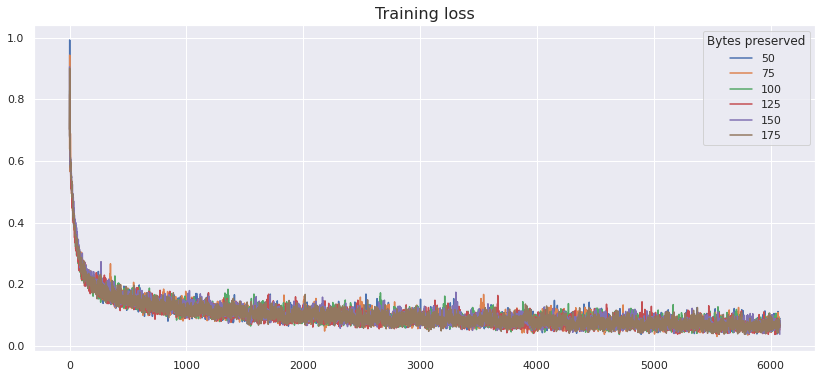

In [6]:
ax = plot_lists([train_losses_50,
                train_losses_75,
                train_losses_100, 
                train_losses_125, 
                train_losses_150, 
                train_losses_175], legend=[50, 75, 100, 125, 150, 175], legend_title="Bytes preserved")
_ = ax.set_title("Training loss", fontsize=16)

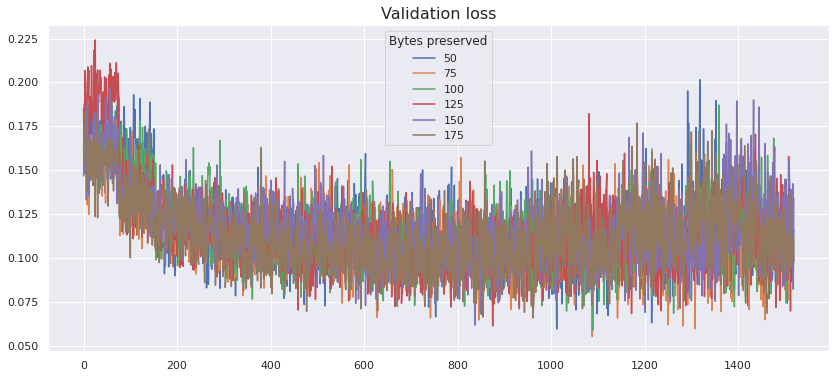

In [7]:
ax = plot_lists([val_losses_50,
                val_losses_75,
                val_losses_100, 
                val_losses_125, 
                val_losses_150, 
                val_losses_175], legend=[50, 75, 100, 125, 150, 175], legend_title="Bytes preserved")
_ = ax.set_title("Validation loss", fontsize=16)

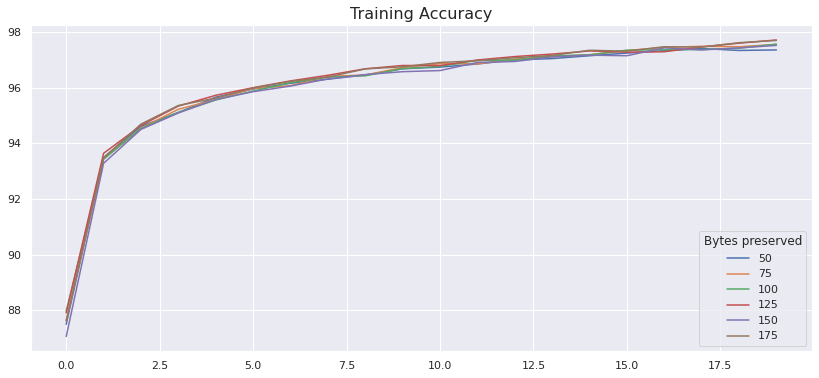

In [8]:
ax = plot_lists([train_metrics_50[:,0], 
                train_metrics_75[:,0], 
                train_metrics_100[:,0], 
                train_metrics_125[:,0], 
                train_metrics_150[:,0], 
                train_metrics_175[:,0]], legend=[50, 75, 100, 125, 150, 175], legend_title="Bytes preserved")
_ = ax.set_title("Training Accuracy", fontsize=16)

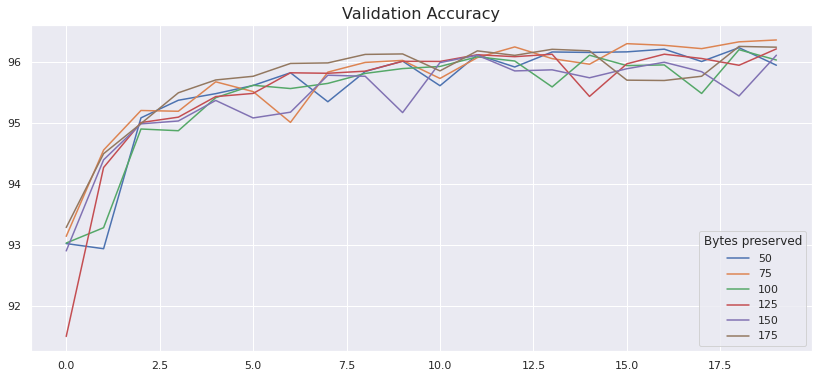

In [9]:
ax = plot_lists([val_metrics_50[:,0], 
                val_metrics_75[:,0], 
                val_metrics_100[:,0], 
                val_metrics_125[:,0], 
                val_metrics_150[:,0], 
                val_metrics_175[:,0]], legend=[50, 75, 100, 125, 150, 175], legend_title="Bytes preserved")
_ = ax.set_title("Validation Accuracy", fontsize=16)

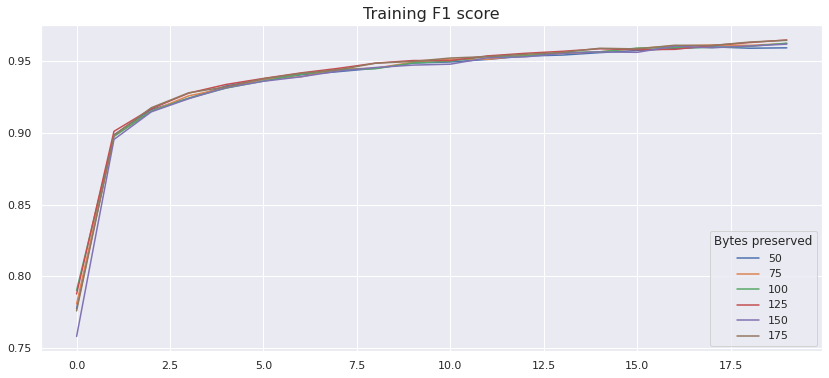

In [10]:
ax = plot_lists([train_metrics_50[:,1], 
            train_metrics_75[:,1], 
            train_metrics_100[:,1], 
            train_metrics_125[:,1], 
            train_metrics_150[:,1], 
            train_metrics_175[:,1]], 
                legend=[50, 75, 100, 125, 150, 175], 
                legend_title="Bytes preserved")
_ = ax.set_title("Training F1 score", fontsize=16)

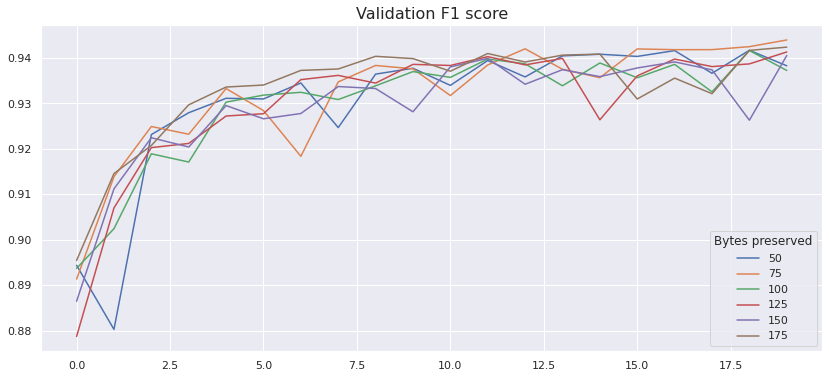

In [11]:
ax = plot_lists([val_metrics_50[:,1], 
            val_metrics_75[:,1], 
            val_metrics_100[:,1], 
            val_metrics_125[:,1], 
            val_metrics_150[:,1], 
            val_metrics_175[:,1]], 
                legend=[50, 75, 100, 125, 150, 175], 
                legend_title="Bytes preserved")
_ = ax.set_title("Validation F1 score", fontsize=16)